In [61]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from preprocessing import Preprocessor
from scipy import interpolate
from network import RNN

In [62]:
pp = Preprocessor(train_path="datasets/no1_train.csv", val_path="datasets/no1_validation.csv")
train_df, val_df, X_feat = pp.preprocess()
X_feat

['hydro',
 'micro',
 'thermal',
 'wind',
 'river',
 'total',
 'sys_reg',
 'flow',
 'min_day_sin',
 'min_day_sin',
 'day_0',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'y_24h',
 'y_yesterday',
 'y_prev']

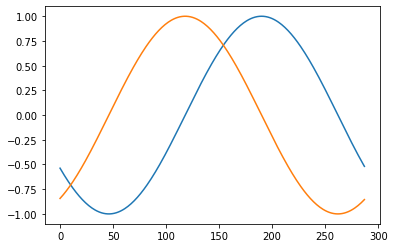

In [63]:

time_of_day_sin = train_df[["min_day_sin"]].to_numpy()
time_of_day_cos = train_df[["min_day_cos"]].to_numpy()
time_steps_day = 1440//5
plt.plot(time_of_day_sin[:time_steps_day])
plt.plot(time_of_day_cos[:time_steps_day])
plt.show()

In [64]:
# day_week_sin = train_df[["day_week_sin"]].to_numpy()
# day_week_cos = train_df[["day_week_sin"]].to_numpy()
# time_steps_day = (60 * 24 * 7)//5
# plt.plot(day_week_sin[:time_steps_day])
# plt.plot(day_week_cos[:time_steps_day])
# plt.show()

In [65]:
val_df.columns

Index(['start_time', 'hydro', 'micro', 'thermal', 'wind', 'river', 'total',
       'y', 'sys_reg', 'flow', 'min_day_sin', 'min_day_cos', 'day_0', 'day_1',
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'y_24h', 'y_yesterday',
       'y_prev'],
      dtype='object')

In [72]:
date_time = pd.to_datetime(train_df["start_time"])
t = train_df[:200]
a = t[date_time.dt.minute == 30]["total"]
a.index
t["total"].index

/var/folders/zr/_vkv5pc53m5cdqgxd4n6qhfr0000gn/T/ipykernel_27638/938045449.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = t[date_time.dt.minute == 30]["total"]


Int64Index([288, 289, 290, 291, 292, 293, 294, 295, 296, 297,
            ...
            478, 479, 480, 481, 482, 483, 484, 485, 486, 487],
           dtype='int64', length=200)

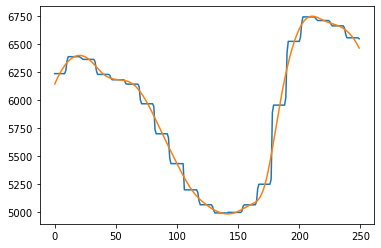

In [91]:
pp2 = Preprocessor(train_path="datasets/no1_train.csv", val_path="datasets/no1_validation.csv")

num_steps = 250
df = pp2.train_df[:num_steps].copy()

df["flow"] = - df["flow"]
df["net"] = df["total"] + df["flow"]
x_total = df["net"].index

date_time = pd.to_datetime(df["start_time"])
y_points_df = df[date_time.dt.minute == 30]["net"]
x_points = y_points_df.index
y_points = df[date_time.dt.minute == 30]["net"].to_numpy()

tck = interpolate.splrep(x_points, y_points)
y_interp = interpolate.splev(x_total, tck)

plt.plot(x_total, df["net"])
plt.plot(x_total, y_interp)
plt.show()

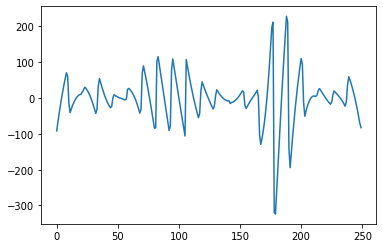

In [93]:
plt.plot(df["net"] - y_interp)
